In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

In [4]:
file_path= 'C:/Users/lrodr/OneDrive/Documentos/master_ucm/trabajos/11/arboles.csv' # Reemplaza con la ruta correcta de tu archivo
df= pd.read_csv(file_path)
df.head()
# Se observa si se tiene algún valor perdido.
df.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [6]:
# Categorizar la variable de respuesta
df['chd'] = df['chd'].apply(lambda x: 'Yes' if x == 1 else'No')
print(df.head())

   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52  Yes
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63  Yes
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46   No
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58  Yes
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49  Yes


In [7]:
#Separar las variables predictoras y la variable de respuesta.
X = df[['tobacco']]
y = df['chd']
# min_sample_split: el número mínimo de casos que contiene una hoja para que pueda ser creada.
# criterion: Criterio de división: “gini”, “entropy”, “log_loss”.
# max_depth= Profundidad máxima del árbol. En caso de no especificar, el clasificador sigue segmentando hasta que las hojas son puras, o se alcanza el min_sample_split. Con caracterilustrativo, se selecciona bajo.
arbol1 = DecisionTreeClassifier(min_samples_split=30, criterion='gini', max_depth= 2)
# Crear un conjunto de entrenamiento y uno de prueba
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ES IMPORTANTE QUE LA DISTRIBUCIÓN DE LAS CLASES SEA 'SIMILAR' EN TRAIN Y TEST.
print(f'La frecuencia de cada clase en train es: \n{y_train.value_counts(normalize=True)}')
print(f'\nLa frecuencia de cada clase en test es: \n{y_test.value_counts(normalize=True)}')
# Construir el modelo de árbol de decisiones
arbol1.fit(X_train, y_train)

La frecuencia de cada clase en traines: 
chd
No     0.658537
Yes    0.341463
Name: proportion, dtype: float64

La frecuencia de cada clase en test es: 
chd
No     0.634409
Yes    0.365591
Name: proportion, dtype: float64


DecisionTreeClassifier(max_depth=2, min_samples_split=30)

In [10]:
# Conocer los niveles de la variable a predecir
print(arbol1.classes_)
# Conocer el nombre de las variables predictoras
print(arbol1.feature_names_in_)
# Obtener información detallada de cada nodo y las reglas de decisión
tree_rules= export_text(arbol1, feature_names=list(X.columns),show_weights=True)
print(tree_rules)

['No' 'Yes']
['tobacco']
|--- tobacco <= 0.48
|   |--- tobacco <= 0.41
|   |   |--- weights: [96.00, 18.00] class: No
|   |--- tobacco >  0.41
|   |   |--- weights: [4.00, 0.00] class: No
|--- tobacco >  0.48
|   |--- tobacco <= 8.04
|   |   |--- weights: [127.00, 78.00] class: No
|   |--- tobacco >  8.04
|   |   |--- weights: [16.00, 30.00] class: Yes



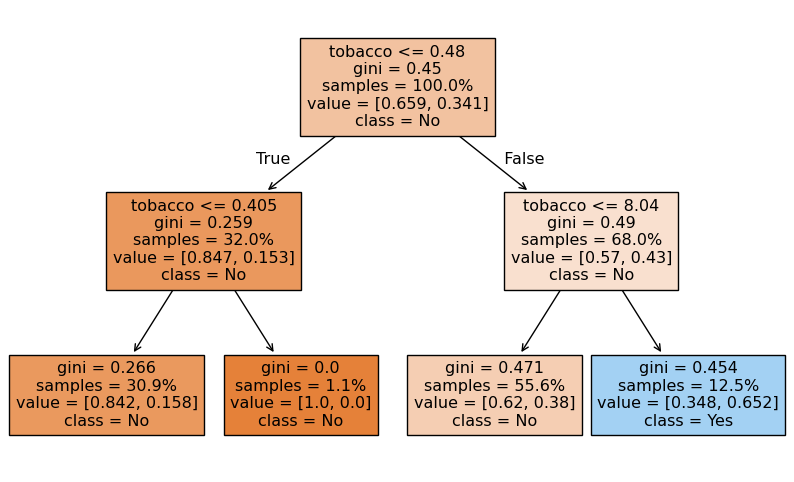

In [11]:
plt.figure(figsize=(10, 6))
plot_tree(arbol1, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True,
proportion= True)
plt.show()

In [12]:
# Se vuelve a entrenar el árbol con más variables. No necesariamente tiene que utilizar todas, por lo que es importante
# conocer la importancia predictiva de cada variable en el modelo.
#es importante tratar de forma adecuada las variables categóricas. Se convierten en numéricas con la regla: onehotencoding.
df[['famhist']] = pd.get_dummies(df[['famhist']],drop_first=True)
# Separar las variables predictoras y la variable de respuesta.
X = df.drop('chd', axis=1)
y = df['chd']
#Se selecciona profundidad 4 sólo con caracterilustrativo, al simplificar el árbol.
arbol2 = DecisionTreeClassifier(min_samples_split=30, criterion='gini', max_depth= 4)
# Crear un conjunto de entrenamiento y uno de prueba
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
# Construir el modelo de árbol de decisiones
arbol2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=30)

      nombre  importancia
0        sbp     0.049070
1    tobacco     0.000000
2        ldl     0.179858
3  adiposity     0.000000
4    famhist     0.056089
5      typea     0.094607
6    obesity     0.105539
7    alcohol     0.000000
8        age     0.514837


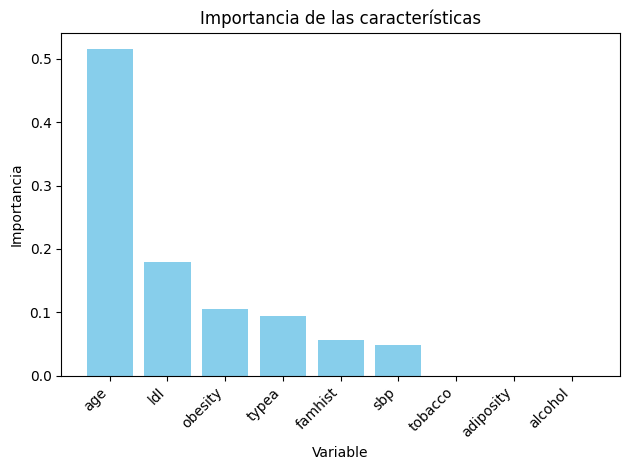

In [13]:
#Se estudia la importancia -o valor predictivo -de cada variable en el modelo.
print(pd.DataFrame({'nombre': arbol2.feature_names_in_, 'importancia': arbol2.feature_importances_}))
# Ordenar el DataFramepor importancia en orden descendente
df_importancia= pd.DataFrame({'Variable': arbol2.feature_names_in_, 'Importancia': arbol2.feature_importances_}).sort_values(by='Importancia', ascending=False)
# Crear un gráfico de barras
plt.bar(df_importancia['Variable'], df_importancia['Importancia'], color='skyblue')
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.xticks(rotation=45, ha='right') # Rotar los nombres en el eje x para mayor legibilidad
plt.tight_layout()
# Mostrar el gráfico
plt.show()

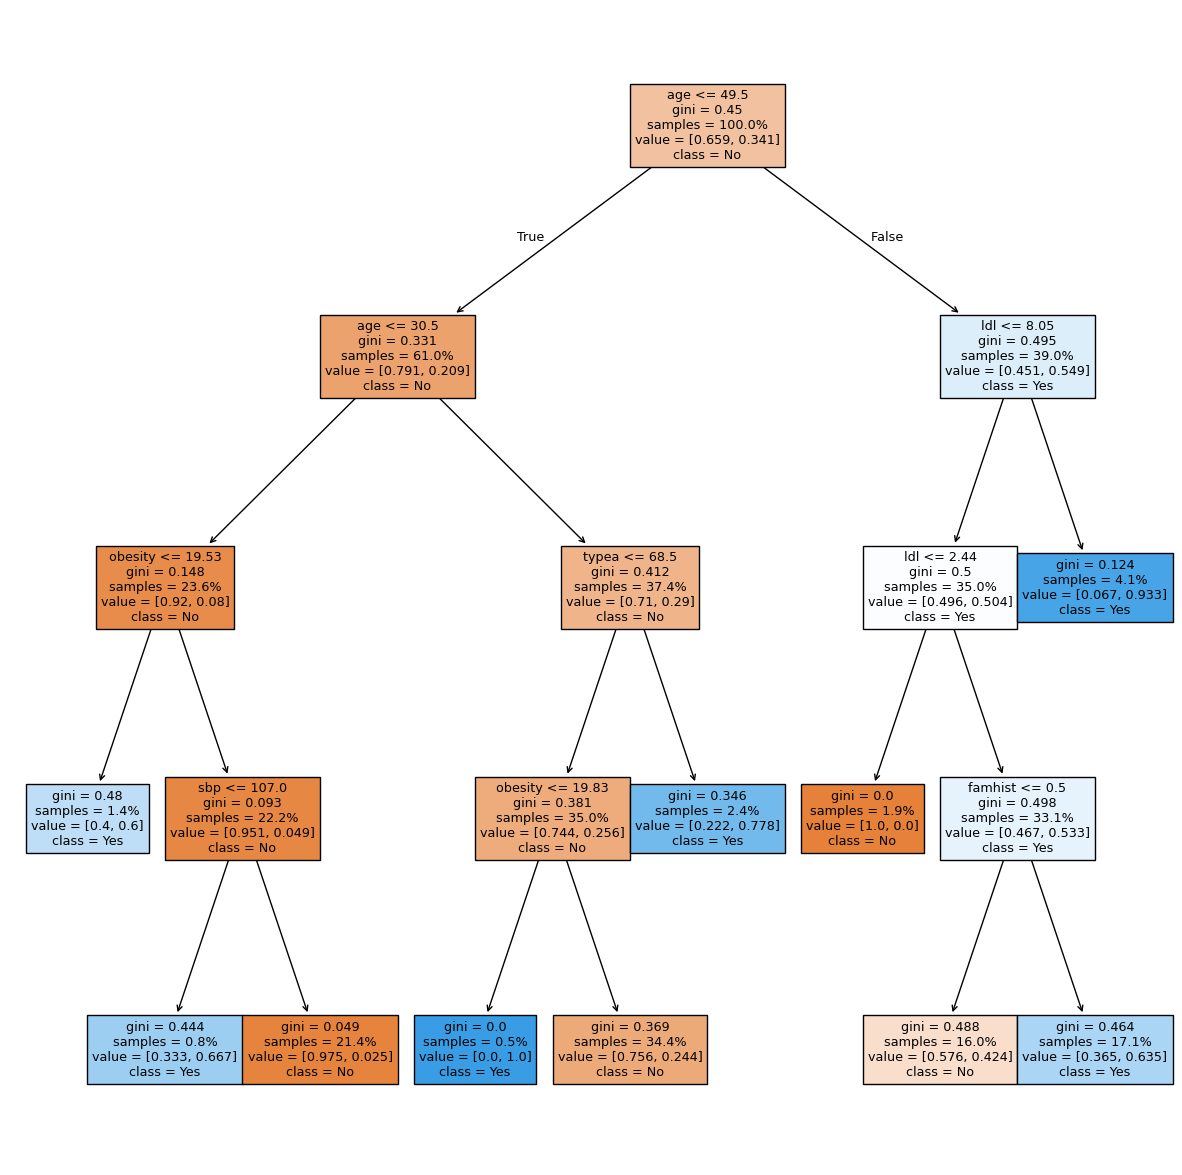

In [14]:
plt.figure(figsize=(15, 15))
plot_tree(arbol2, feature_names=X.columns.tolist(),
class_names=['No', 'Yes'], filled=True,
proportion= True)
plt.show()

In [16]:
file_path= 'C:/Users/lrodr/OneDrive/Documentos/master_ucm/trabajos/11/compress.csv' # Reemplaza con la ruta correcta de tu archivo
compress= pd.read_csv(file_path)
compress.head()
compress.isna().sum()

cstrength    0
cement       0
blast        0
ash          0
water        0
plasti       0
aggreg       0
fineagg      0
age          0
dtype: int64

In [17]:
# Separar las variables predictoras y la variable de respuesta.
X_c= compress.drop('cstrength', axis=1)
y_c= compress['cstrength']
# criterion: Criterio de división: “squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”.
# Se selecciona squarederror con motivos ilustrativos. Es equivalente a la reducción de varianza.
# A priori, con motivos ilustrativos, se mantiene min_sample_splity max_depthen estos valores para facilitar la visualización del árbol.
# Recordar que estos son parámetros a modificar para encontrar el modelo óptimo.
# cpp_alphaes el parámetro de complejidad, el cual establece “penalizaciones” si se producen muchas divisiones. Cuanto más alto
# más pequeño será el árbol.
arbol3 = DecisionTreeRegressor(min_samples_split=30, criterion='squared_error', max_depth= 4, ccp_alpha= 0.01)
# Crear un conjunto de entrenamiento y uno de prueba
X_train_c, X_test_c, y_train_c, y_test_c= train_test_split(X_c, y_c, test_size=0.2, random_state=42)
# Construir el modelo de árbol de decisiones
arbol3.fit(X_train_c, y_train_c)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=4, min_samples_split=30)

    nombre  importancia
0   cement     0.430857
1    blast     0.034447
2      ash     0.020320
3    water     0.141266
4   plasti     0.004367
5   aggreg     0.000000
6  fineagg     0.000000
7      age     0.368743


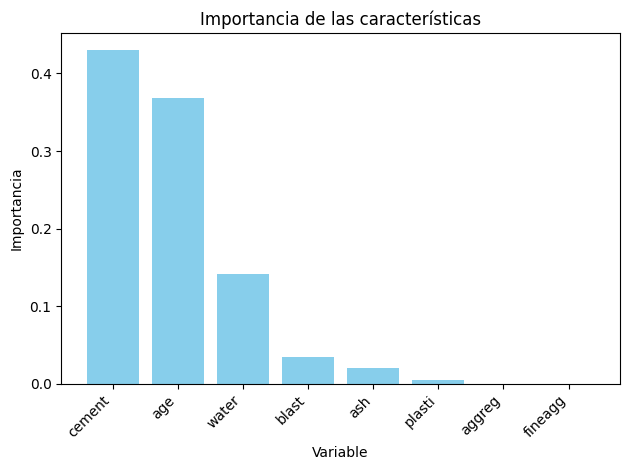

In [18]:
print(pd.DataFrame({'nombre': arbol3.feature_names_in_, 'importancia': arbol3.feature_importances_}))
# Ordenar el DataFramepor importancia en orden descendente
df_importancia_c= pd.DataFrame({'Variable': arbol3.feature_names_in_, 'Importancia': arbol3.feature_importances_}).sort_values(by='Importancia', ascending=False)
# Crear un gráfico de barras
plt.bar(df_importancia_c['Variable'], df_importancia_c['Importancia'], color='skyblue')
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.xticks(rotation=45, ha='right') # Rotar los nombres en el eje x para mayor legibilidad
plt.tight_layout()
# Mostrar el gráfico
plt.show()

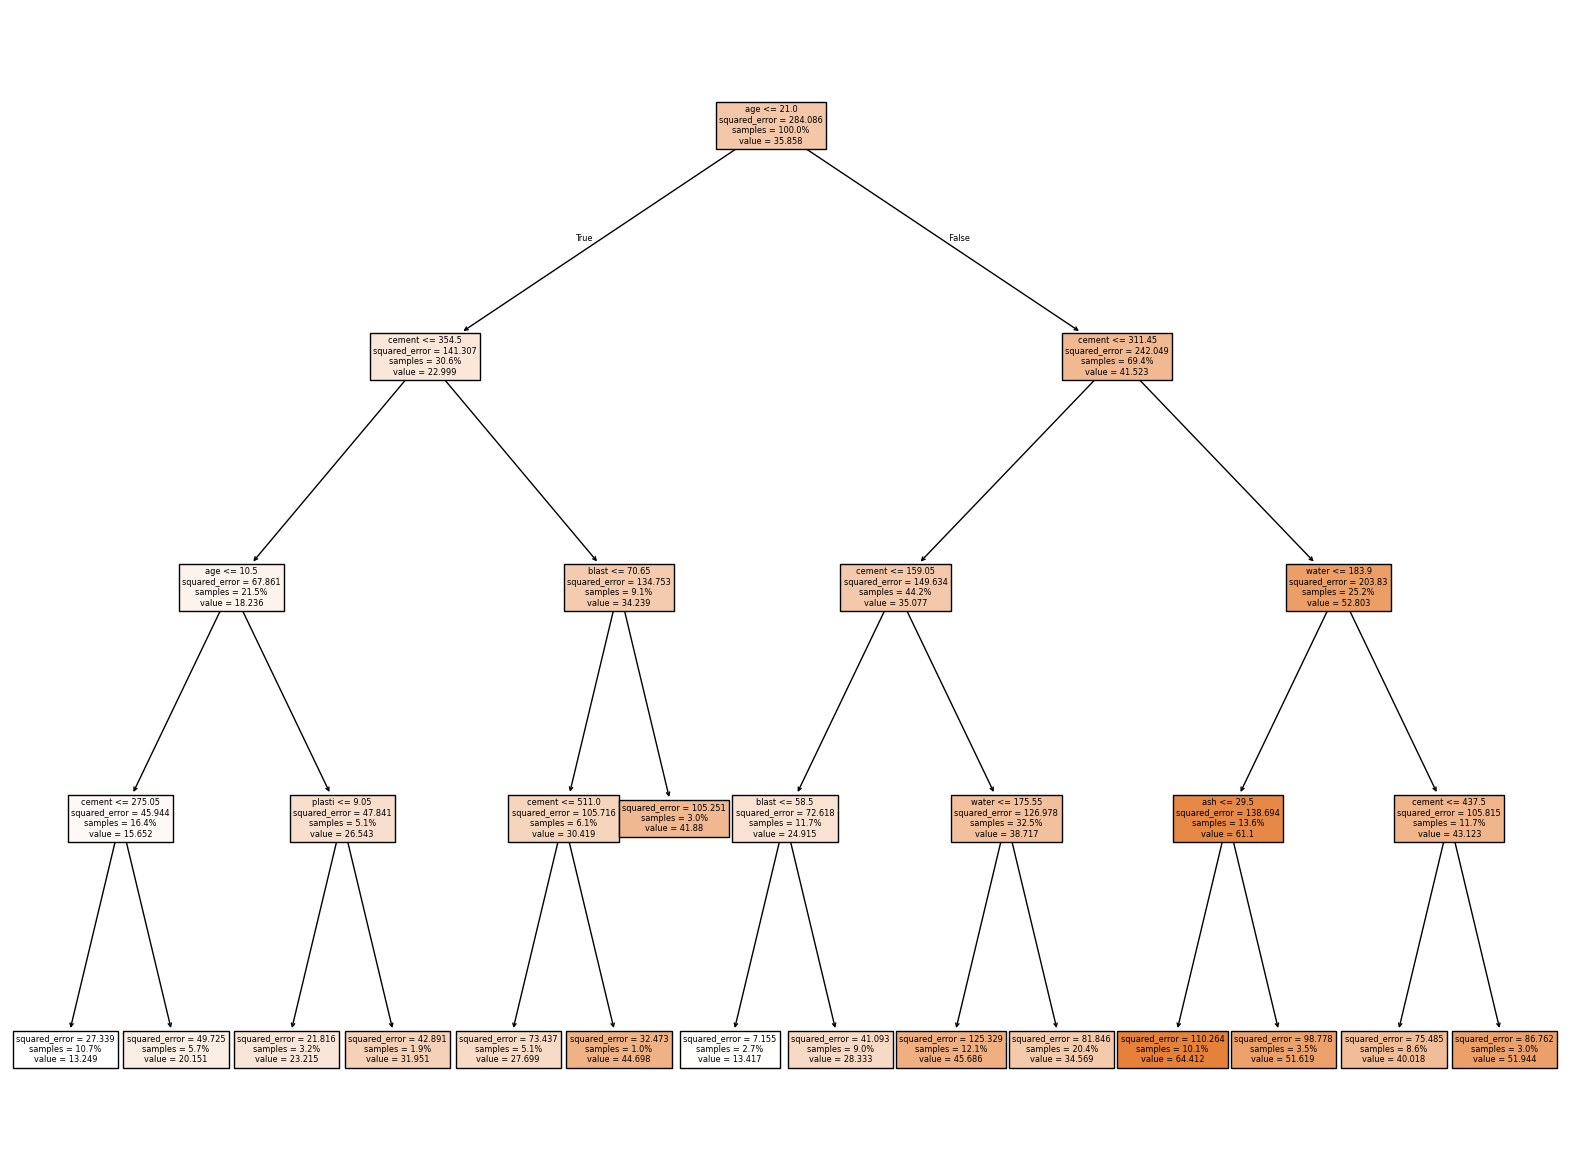

In [19]:
plt.figure(figsize=(20, 15))
plot_tree(arbol3, feature_names=X_c.columns.tolist(), filled=True,
proportion = True)
plt.show()

In [20]:
## tuneo y evaluación predictiva del modelo para variable dependiente categórica.
params= {
'max_depth': [2, 3, 5, 10, 20],
'min_samples_split': [5, 10, 20, 50, 100],
'criterion': ["gini", "entropy"]
}
scoring_metrics= ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
#recordar que arbol2 es el árbol cuyas VI son todas las variables.
# cv= crossvalidation
grid_search= GridSearchCV(estimator=arbol2,
param_grid=params,
cv=4, scoring= scoring_metrics, refit='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=4,
                                              min_samples_split=30),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             refit='accuracy',
             scoring=['accuracy', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [22]:
# Obtener resultados del gridsearch
results= pd.DataFrame(grid_search.cv_results_)
# Mostrar resultados
print("Resultados de GridSearch:")
print(results[['params', 'mean_test_accuracy',
'mean_test_precision_macro',
'mean_test_recall_macro', 'mean_test_f1_macro']])
# Obtener el mejor modelo
best_model= grid_search.best_estimator_
print(grid_search.best_estimator_)

Resultados de GridSearch:
                                               params  mean_test_accuracy  \
0   {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.655797   
1   {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.655797   
2   {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.655797   
3   {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.655797   
4   {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.653109   
5   {'criterion': 'gini', 'max_depth': 3, 'min_sam...            0.631399   
6   {'criterion': 'gini', 'max_depth': 3, 'min_sam...            0.625964   
7   {'criterion': 'gini', 'max_depth': 3, 'min_sam...            0.628711   
8   {'criterion': 'gini', 'max_depth': 3, 'min_sam...            0.626023   
9   {'criterion': 'gini', 'max_depth': 3, 'min_sam...            0.628711   
10  {'criterion': 'gini', 'max_depth': 5, 'min_sam...            0.631370   
11  {'criterion': 'gini', 'max_depth': 5, 'min_sam

In [23]:
# Para seleccionar una parametrización específica y la mejor de acuerdo con el criterio
# de GridSearch, acceder a esta y conocer su combinación.
results.iloc[8].params
# (En este caso, son ejemplos de selección aleatorios para ilustrar el script de selección y representación),.
# se selecciona el modelo candidato, y se procede a analizar su robustez a lo largo de crossvalidation.
res_1 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[2]
res_2 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[4]
res_3 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[18]

C:\Users\lrodr\AppData\Local\Temp\ipykernel_12964\1095550248.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([res_1.values,res_2.values,res_3.values], labels= ['res_1','res_2','res_3'])


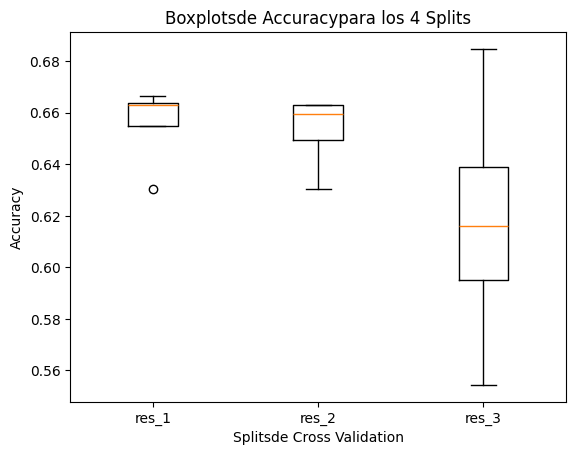

In [26]:
# Crear un boxplotpara los cuatro valores de accuracy
plt.boxplot([res_1.values,res_2.values,res_3.values], labels= ['res_1','res_2','res_3'])
plt.title('Boxplotsde Accuracypara los 4 Splits')
plt.xlabel('Splitsde Cross Validation')
plt.ylabel('Accuracy')
plt.show()
# Nótese en la solución que boxplotscon gran amplitud no son deseables,
# ya que se caracterizan por poca robustez de la solución

In [27]:
# Obtener el mejor modelo (bestestimador, o el seleccionado dado los pasos anteriores).
best_model= grid_search.best_estimator_
# Ajustar el mejor modelo con todo el conjunto de entrenamiento
best_model.fit(X_train, y_train)
# Predicciones en conjunto de entrenamiento y prueba
y_train_pred= best_model.predict(X_train)
y_test_pred= best_model.predict(X_test)

In [28]:
#medidas de bondad de ajuste en train
conf_matrix= confusion_matrix(y_train, y_train_pred)
print("Matriz de Confusión:")
print(conf_matrix)
print("\nMedidasde Desempeño:")
print(classification_report(y_train, y_train_pred))

Matriz de Confusión:
[[181  62]
 [ 40  86]]

Medidasde Desempeño:
              precision    recall  f1-score   support

          No       0.82      0.74      0.78       243
         Yes       0.58      0.68      0.63       126

    accuracy                           0.72       369
   macro avg       0.70      0.71      0.70       369
weighted avg       0.74      0.72      0.73       369




Áreabajo la curva ROC (AUC): 0.76


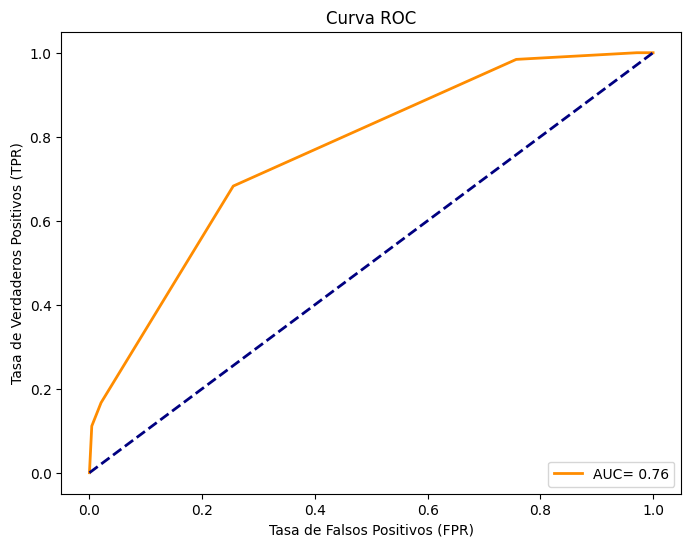

In [30]:
y_train_auc= pd.get_dummies(y_train,drop_first=True)
# Calcular el área bajo la curva ROC (AUC)
y_prob_train= best_model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds= roc_curve(y_train_auc, y_prob_train)
roc_auc= auc(fpr, tpr)
print(f"\nÁreabajo la curva ROC (AUC): {roc_auc:.2f}")
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC= {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [31]:
# medidas de bondad de ajuste en test
conf_matrix= confusion_matrix(y_test, y_test_pred)
print("Matriz de Confusión:")
print(conf_matrix)
print("\nMedidasde Desempeño:")
print(classification_report(y_test, y_test_pred))

Matriz de Confusión:
[[45 14]
 [13 21]]

Medidasde Desempeño:
              precision    recall  f1-score   support

          No       0.78      0.76      0.77        59
         Yes       0.60      0.62      0.61        34

    accuracy                           0.71        93
   macro avg       0.69      0.69      0.69        93
weighted avg       0.71      0.71      0.71        93




Áreabajo la curva ROC (AUC): 0.76


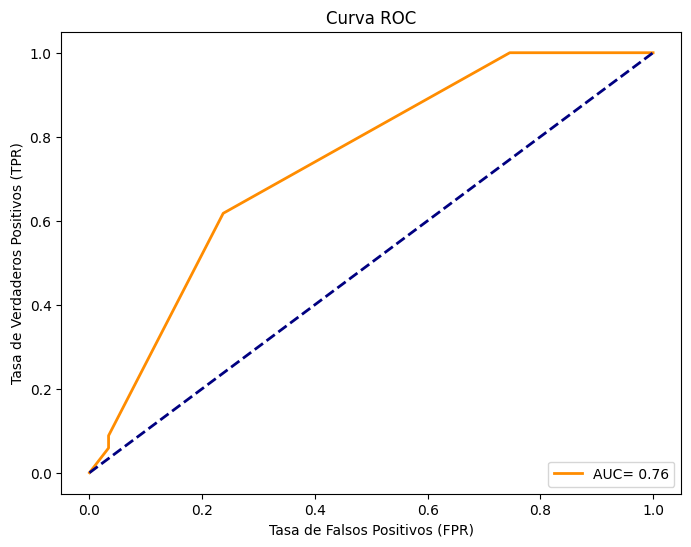

In [33]:
y_test_auc= pd.get_dummies(y_test,drop_first=True)
# Calcular el área bajo la curva ROC (AUC)
y_prob_test= best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds= roc_curve(y_test_auc, y_prob_test)
roc_auc_test= auc(fpr, tpr)
print(f"\nÁreabajo la curva ROC (AUC): {roc_auc:.2f}")
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC= {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

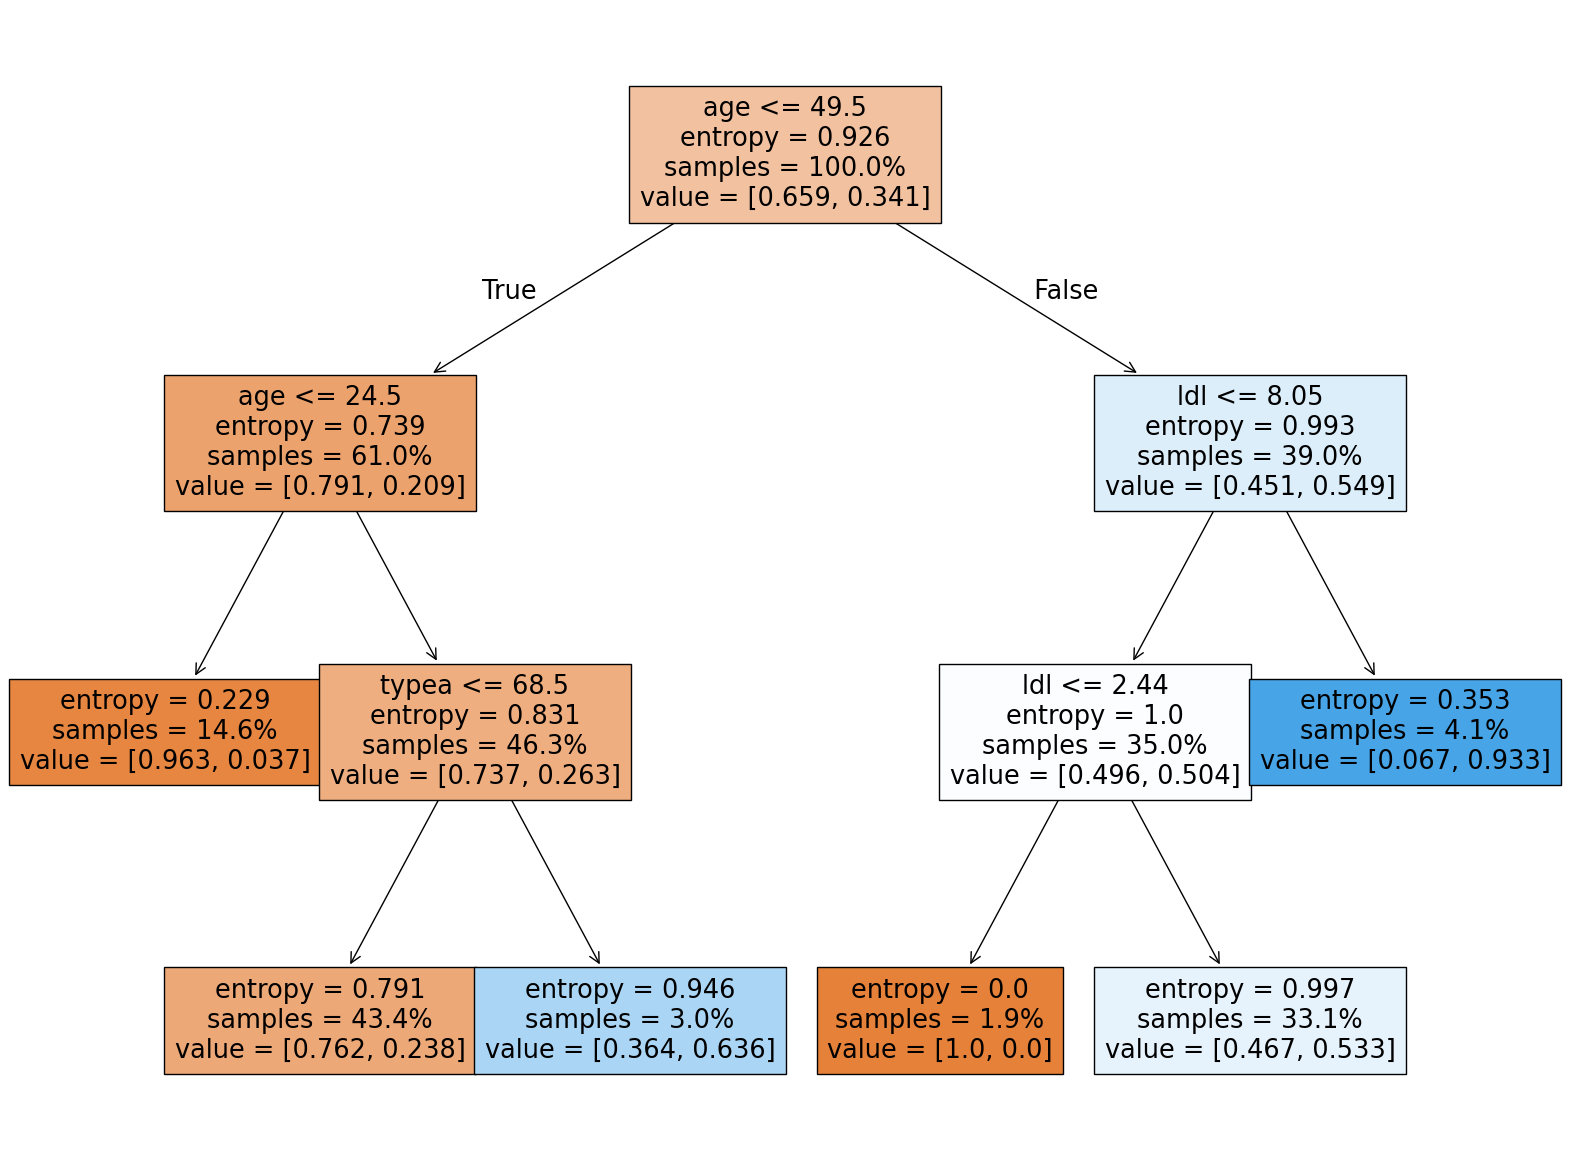

In [34]:
plt.figure(figsize=(20, 15))
plot_tree(best_model, feature_names=X.columns.tolist(), filled=True,
proportion = True)
plt.show()

In [35]:
## tuneo y evaluación predictiva del modelo para variable dependiente numérica.
params_c= {
'max_depth': [2, 3, 5, 10, 20],
'min_samples_split': [5, 10, 20, 50, 100],
'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
# Definir las métricas de evaluación que deseas utilizar
scoring_metrics_c= {'MAE': make_scorer(mean_absolute_error),
'MSE': make_scorer(mean_squared_error),
'RMSE': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False))}
# cv= crossvalidation
grid_search_c= GridSearchCV(estimator=arbol3,
param_grid=params_c,
cv=4, scoring= scoring_metrics_c, refit='MSE')
grid_search_c.fit(X_train_c, y_train_c)

C:\Users\lrodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lrodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\lrodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lrodr\AppData\Local\Temp\ipykernel_12964\1789103

GridSearchCV(cv=4,
             estimator=DecisionTreeRegressor(ccp_alpha=0.01, max_depth=4,
                                             min_samples_split=30),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             refit='MSE',
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, response_method='predict'),
                      'RMSE': make_scorer(<lambda>, response_method='predict')})

In [36]:
# Obtener resultados del gridsearch
results_c= pd.DataFrame(grid_search_c.cv_results_)
# Mostrar resultados
print("Resultados de GridSearch:")
print(results_c)
# Obtener el mejor modelo
best_model_c= grid_search_c.best_estimator_
print(grid_search_c.best_estimator_)

Resultados de GridSearch:
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.002748      0.001298         0.012787        0.018684   
1        0.002383      0.000959         0.002020        0.000036   
2        0.002277      0.000419         0.002476        0.000478   
3        0.002707      0.000429         0.001994        0.000014   
4        0.002249      0.000426         0.002228        0.000400   
..            ...           ...              ...             ...   
95       0.005247      0.000435         0.002004        0.000002   
96       0.005679      0.000435         0.002002        0.000004   
97       0.004258      0.000830         0.002513        0.000579   
98       0.004475      0.000521         0.002253        0.000828   
99       0.003551      0.000511         0.002952        0.000050   

   param_criterion  param_max_depth  param_min_samples_split  \
0    squared_error                2                        5   
1    squared_error           

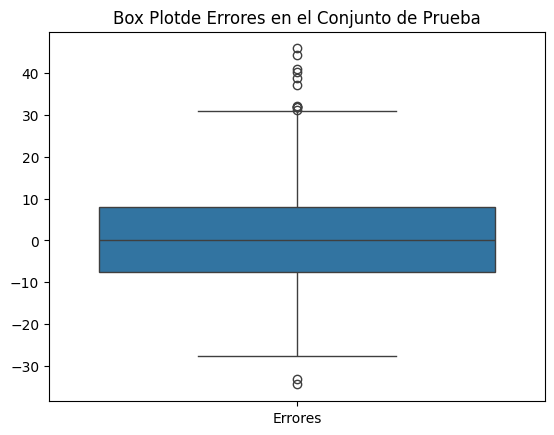

In [37]:
# Ajustar el mejor modelo con todo el conjunto de entrenamiento
best_model_c.fit(X_train_c, y_train_c)
# Predicciones en conjunto de entrenamiento y prueba
y_train_pred_c= best_model_c.predict(X_train_c)
y_test_pred_c= best_model_c.predict(X_test_c)
# Medidas de bondad de ajuste en train
y_pred_train_c= best_model_c.predict(X_train_c)
# Suponiendo que tienes los valores reales en y_test_cy
#las predicciones en y_pred_test_c
errores = y_train_c-y_pred_train_c
# Convertir los errores a un DataFrame
errores_df= pd.DataFrame({'Errores': errores})
# Box Plotde los errores en el conjunto de prueba
sns.boxplot(errores_df)
plt.title('Box Plotde Errores en el Conjunto de Prueba')
plt.show()

In [38]:
# Calcular diferentes medidas de bondad de ajuste
mae = mean_absolute_error(y_train_c, y_pred_train_c)
mse= mean_squared_error(y_train_c, y_pred_train_c)
rmse= np.sqrt(mse)
r2 = r2_score(y_train_c, y_pred_train_c)
# Imprimir las métricas
print(f'MAE(Error Absoluto Medio): {mae:.2f}')
print(f'MSE(Error Cuadrático Medio): {mse:.2f}')
print(f'RMSE(Raíz del Error Cuadrático Medio): {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE(Error Absoluto Medio): 9.46
MSE(Error Cuadrático Medio): 146.00
RMSE(Raíz del Error Cuadrático Medio): 12.08
R²: 0.49


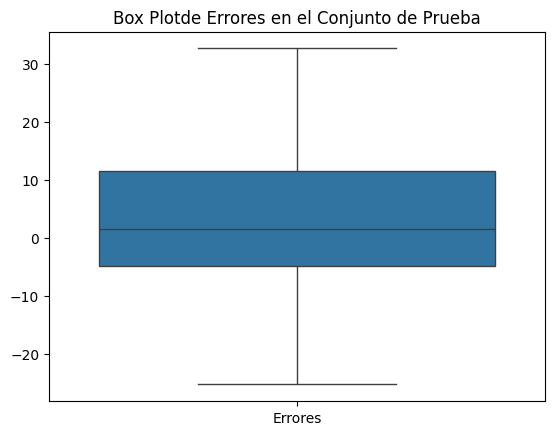

In [39]:
# Medidas de bondad de ajuste en test:
# Medidas de bondad de ajuste en train
y_pred_test_c= best_model_c.predict(X_test_c)
# Suponiendo que tienes los valores reales en y_test_cy
#las predicciones en y_pred_test_c
errores = y_test_c-y_pred_test_c
# Convertir los errores a un DataFrame
errores_df= pd.DataFrame({'Errores': errores})
# Box Plotde los errores en el conjunto de prueba
sns.boxplot(errores_df)
plt.title('Box Plotde Errores en el Conjunto de Prueba')
plt.show()

In [40]:
mae = mean_absolute_error(y_test_c, y_pred_test_c)
mse= mean_squared_error(y_test_c, y_pred_test_c)
rmse= np.sqrt(mse)
r2 = r2_score(y_test_c, y_pred_test_c)
# Imprimir las métricas
print(f'MAE(Error Absoluto Medio): {mae:.2f}')
print(f'MSE(Error Cuadrático Medio): {mse:.2f}')
print(f'RMSE(Raíz del Error Cuadrático Medio): {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE(Error Absoluto Medio): 9.49
MSE(Error Cuadrático Medio): 141.96
RMSE(Raíz del Error Cuadrático Medio): 11.91
R²: 0.45


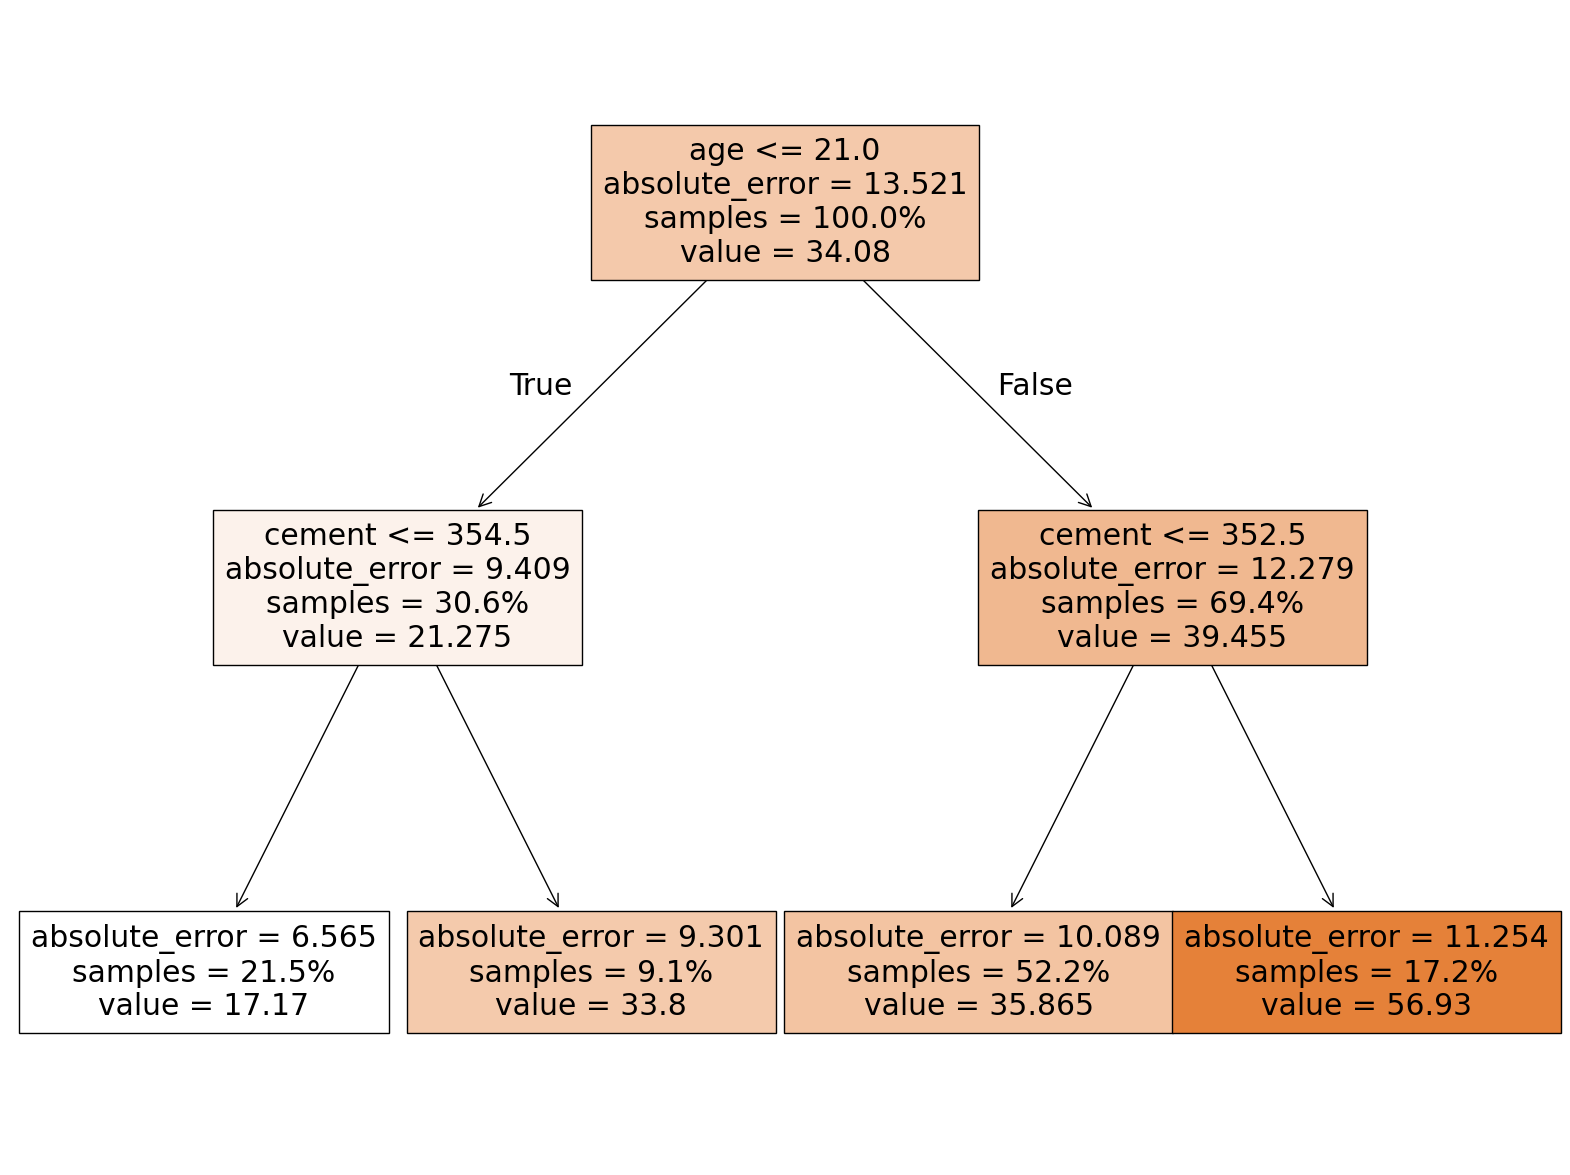

In [41]:
plt.figure(figsize=(20, 15))
plot_tree(best_model_c, feature_names=X_c.columns.tolist(), filled=True,
proportion = True)
plt.show()